In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize
from scipy import optimize
from sklearn.metrics import mean_squared_error
import pandas as pd

eps = 0.001
seed = np.random.RandomState(12345)

## data generation
# alpha = seed.random()
# beta = seed.random()
# x = np.arange(0, 101) / 100
# y = alpha * x + beta + seed.normal(0, 1, 101)

# pd.DataFrame({'x' : x, 'y': y}).to_csv('./data.csv',index=False)


data = pd.read_csv('./data.csv')
x = data['x'].values
y = data['y'].values
alpha = 0.9296160928171479
beta = 0.3163755545817859

In [2]:
alpha 

0.9296160928171479

In [3]:
beta

0.3163755545817859

In [4]:
def linear(x, a, b):
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)


def minimization_function_linear(koefs):
    a,b = koefs
    return mean_squared_error(linear(x,a,b),y,squared=False)


def minimization_function_rational(koefs):
    a,b = koefs
    return mean_squared_error(rational(x,a,b),y,squared=False)

Optimization terminated successfully.
         Current function value: 1.042379
         Iterations: 23
         Function evaluations: 44


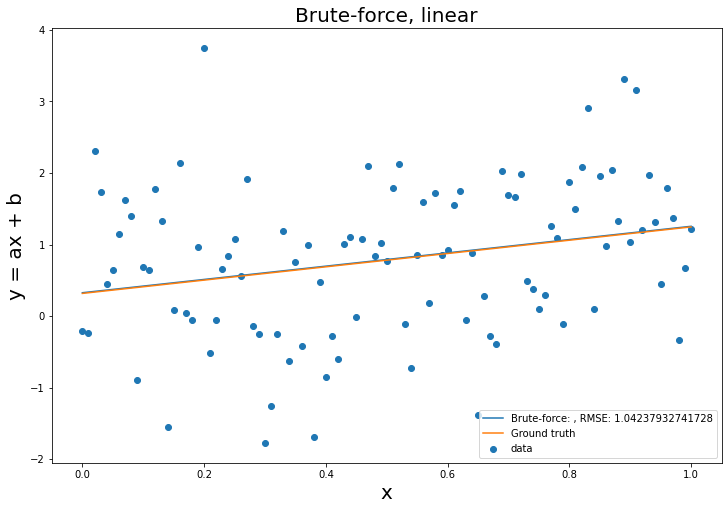

In [5]:
brute = optimize.brute(
        minimization_function_linear, 
        ((0, 1), (0, 1)), 
        disp=True,
    )
brute_linear_a, brute_linear_b =  brute

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(x, 
        linear(x, *brute), 
        label=f'Brute-force: , RMSE: {mean_squared_error(linear(x,brute_linear_a, brute_linear_b),y,squared=False)}')
                                     
ax.plot(x, 
        linear(x, alpha, beta), 
        label='Ground truth')
ax.scatter(x, y, label='data')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y = ax + b', fontsize=20)
ax.set_title('Brute-force, linear', fontsize=20)
ax.legend()
plt.show()
fig.savefig(f'./images/linear_brute.png')

Optimization terminated successfully.
         Current function value: 1.042379
         Iterations: 23
         Function evaluations: 44


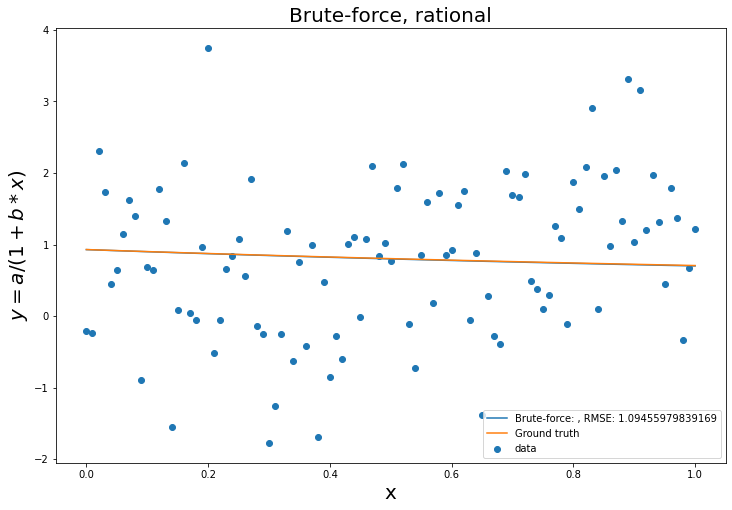

In [6]:
brute = optimize.brute(
        minimization_function_linear, 
        ((0, 1), (0, 1)), 
        disp=True,
    )
brute_rational_a, brute_rational_b =  brute

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(x, 
        rational(x, *brute), 
        label=f'Brute-force: , RMSE: {mean_squared_error(rational(x,brute_rational_a, brute_rational_b),y,squared=False)}')
                                     
ax.plot(x, 
        rational(x, alpha, beta), 
        label='Ground truth')
ax.scatter(x, y, label='data')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel(r'$y = a/(1 + b * x)$', fontsize=20)
ax.set_title('Brute-force, rational', fontsize=20)
ax.legend()
plt.show()
fig.savefig(f'./images/rational_brute.png')